In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,Input
from tensorflow.keras.models import load_model

In [4]:
print(os.getcwd())

/Users/zaynabramou/Desktop/TrafficSignRecognititonTool


In [6]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [7]:
cur_path

'/Users/zaynabramou/Desktop/TrafficSignRecognititonTool'

In [15]:
for i in range(classes):
    path = os.path.join(cur_path, 'Data', 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [16]:
data = np.array(data)
labels = np.array(labels)

In [17]:
if not os.path.exists('Training'):
    os.mkdir('Training')

np.save('./Training/data', data)
np.save('./Training/target', labels)


In [18]:
data=np.load('./Training/data.npy')
labels=np.load('./Training/target.npy')

In [19]:
print(data.shape, labels.shape)

(235254, 30, 30, 3) (235254,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(188203, 30, 30, 3) (47051, 30, 30, 3) (188203,) (47051,)


In [22]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [27]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [28]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 174s 29ms/step - accuracy: 0.7196 - loss: 1.1579 - val_accuracy: 0.9817 - val_loss: 0.0666
Epoch 2/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 171s 29ms/step - accuracy: 0.9391 - loss: 0.2335 - val_accuracy: 0.9892 - val_loss: 0.0395
Epoch 3/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 171s 29ms/step - accuracy: 0.9439 - loss: 0.2332 - val_accuracy: 0.9914 - val_loss: 0.0311
Epoch 4/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 194s 33ms/step - accuracy: 0.9464 - loss: 0.2386 - val_accuracy: 0.9922 - val_loss: 0.0287
Epoch 5/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 175s 30ms/step - accuracy: 0.9472 - loss: 0.2374 - val_accuracy: 0.9876 - val_loss: 0.0431
Epoch 6/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 196s 33ms/step - accuracy: 0.9479 - loss: 0.2479 - val_accuracy: 0.9875 - val_loss: 0.0436
Epoch 7/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 186s 32ms/step - accuracy: 0.9517 - loss: 0.2326 - val_accuracy: 0.9918 - val_loss: 0.0299
Epoch 8/20
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 182s 31ms/step - accuracy: 

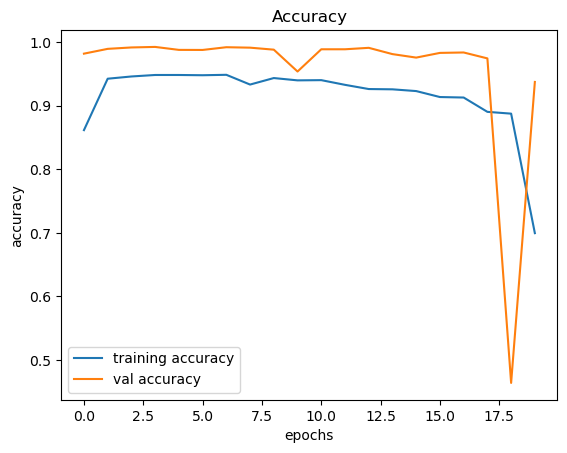

In [30]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

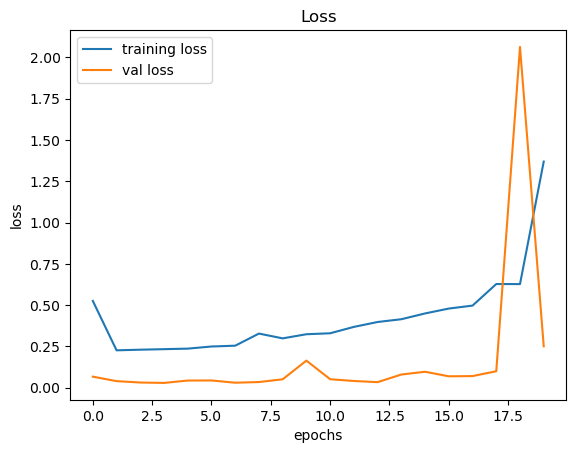

In [31]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
def testing(testcsv):
    if not os.path.exists(testcsv):
        raise FileNotFoundError(f"The file {testcsv} was not found.")

    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        # Prepend the base path to the image path
        full_img_path = os.path.join('./Data', img)  # Adjust the base path as necessary
        if not os.path.exists(full_img_path):
            print(f"Warning: The image {full_img_path} was not found.")
            continue
        image = Image.open(full_img_path)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label

In [40]:
X_test, label = testing('./Data/Test.csv')

In [43]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [45]:
from sklearn.metrics import accuracy_score
# Assuming Y_pred_classes contains the class labels obtained using np.argmax
print(accuracy_score(label, Y_pred_classes))


0.8821060965954077


In [49]:
#model.save("./models/TrafficSignModel.h5")
#When loading the model back, use : model = load_model("./models/TrafficSignModel.keras")
model.save("./models/TrafficSignModel.keras")



In [50]:
model = load_model("./models/TrafficSignModel.keras")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [51]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [56]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test = np.array(data)
    predictions = model.predict(X_test)
    Y_pred = np.argmax(predictions, axis=1)
    return image, Y_pred


In [58]:
model = load_model('./models/TrafficSignModel.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted traffic sign is:  Speed limit (60km/h)


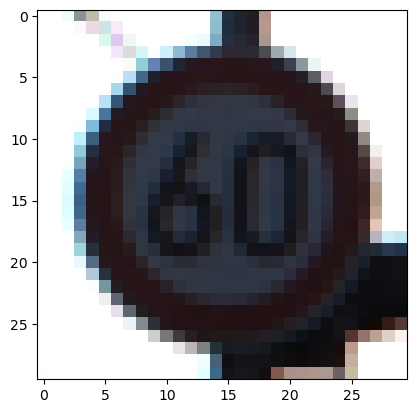

In [60]:
img_path = '/Users/zaynabramou/Desktop/TrafficSignRecognititonTool/Data/Test/00700.png'
plot, prediction = test_on_img(img_path)
print("Predicted traffic sign is: ", classes[prediction[0]])

plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted traffic sign is:  Right-of-way at intersection


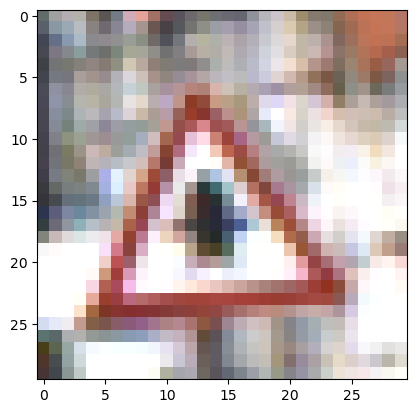

In [61]:
img_path = '/Users/zaynabramou/Desktop/TrafficSignRecognititonTool/Data/Test/00900.png'
plot, prediction = test_on_img(img_path)
print("Predicted traffic sign is: ", classes[prediction[0]])

plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted traffic sign is:  End of speed limit (80km/h)


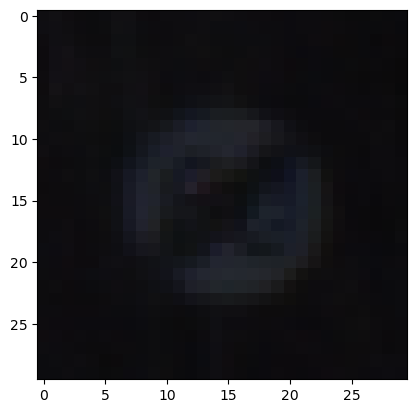

In [62]:
img_path = '/Users/zaynabramou/Desktop/TrafficSignRecognititonTool/Data/Test/00129.png'
plot, prediction = test_on_img(img_path)
print("Predicted traffic sign is: ", classes[prediction[0]])

plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted traffic sign is:  Road work


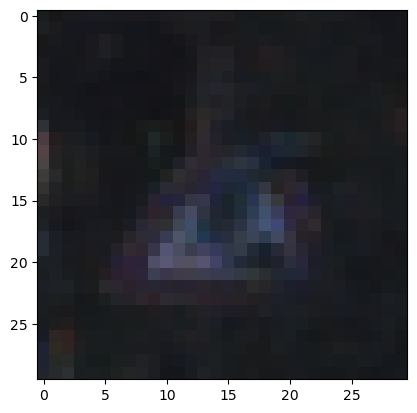

In [63]:
img_path = '/Users/zaynabramou/Desktop/TrafficSignRecognititonTool/Data/Test/00145.png'
plot, prediction = test_on_img(img_path)
print("Predicted traffic sign is: ", classes[prediction[0]])

plt.imshow(plot)
plt.show()

In [64]:
from keras.models import load_model
model = load_model('./model/TrafficSignModel.keras')


ValueError: File not found: filepath=./model/TrafficSignModel.keras. Please ensure the file is an accessible `.keras` zip file.

In [65]:
import os
print(os.getcwd())


/Users/zaynabramou/Desktop/TrafficSignRecognititonTool


In [66]:
ls ./model

ls: ./model: No such file or directory
